In [15]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Índice

1. [Chequeo de nulos](#chequeo-de-nulos)
2. [Valores duplicados](#valores-duplicados)
3. [Valores faltantes](#valores-faltantes)
4. [Tipos de datos](#tipos-de-datos)
5. [Análisis Outlier](#analisis-outlier)
6. [Análisis estadístico de datos](#analisis-estadistico-de-datos)
7. [Análisis de correlaciones bi y multivariado](#analisis-de-correlaciones-bi-y-multivariado)

---

In [16]:
basepath = 'C:/Users/fate8/Desktop/PI2/'

In [17]:
df_maps = pd.read_csv(basepath + 'data_local/df_maps.csv')

### Chequeo de nulos

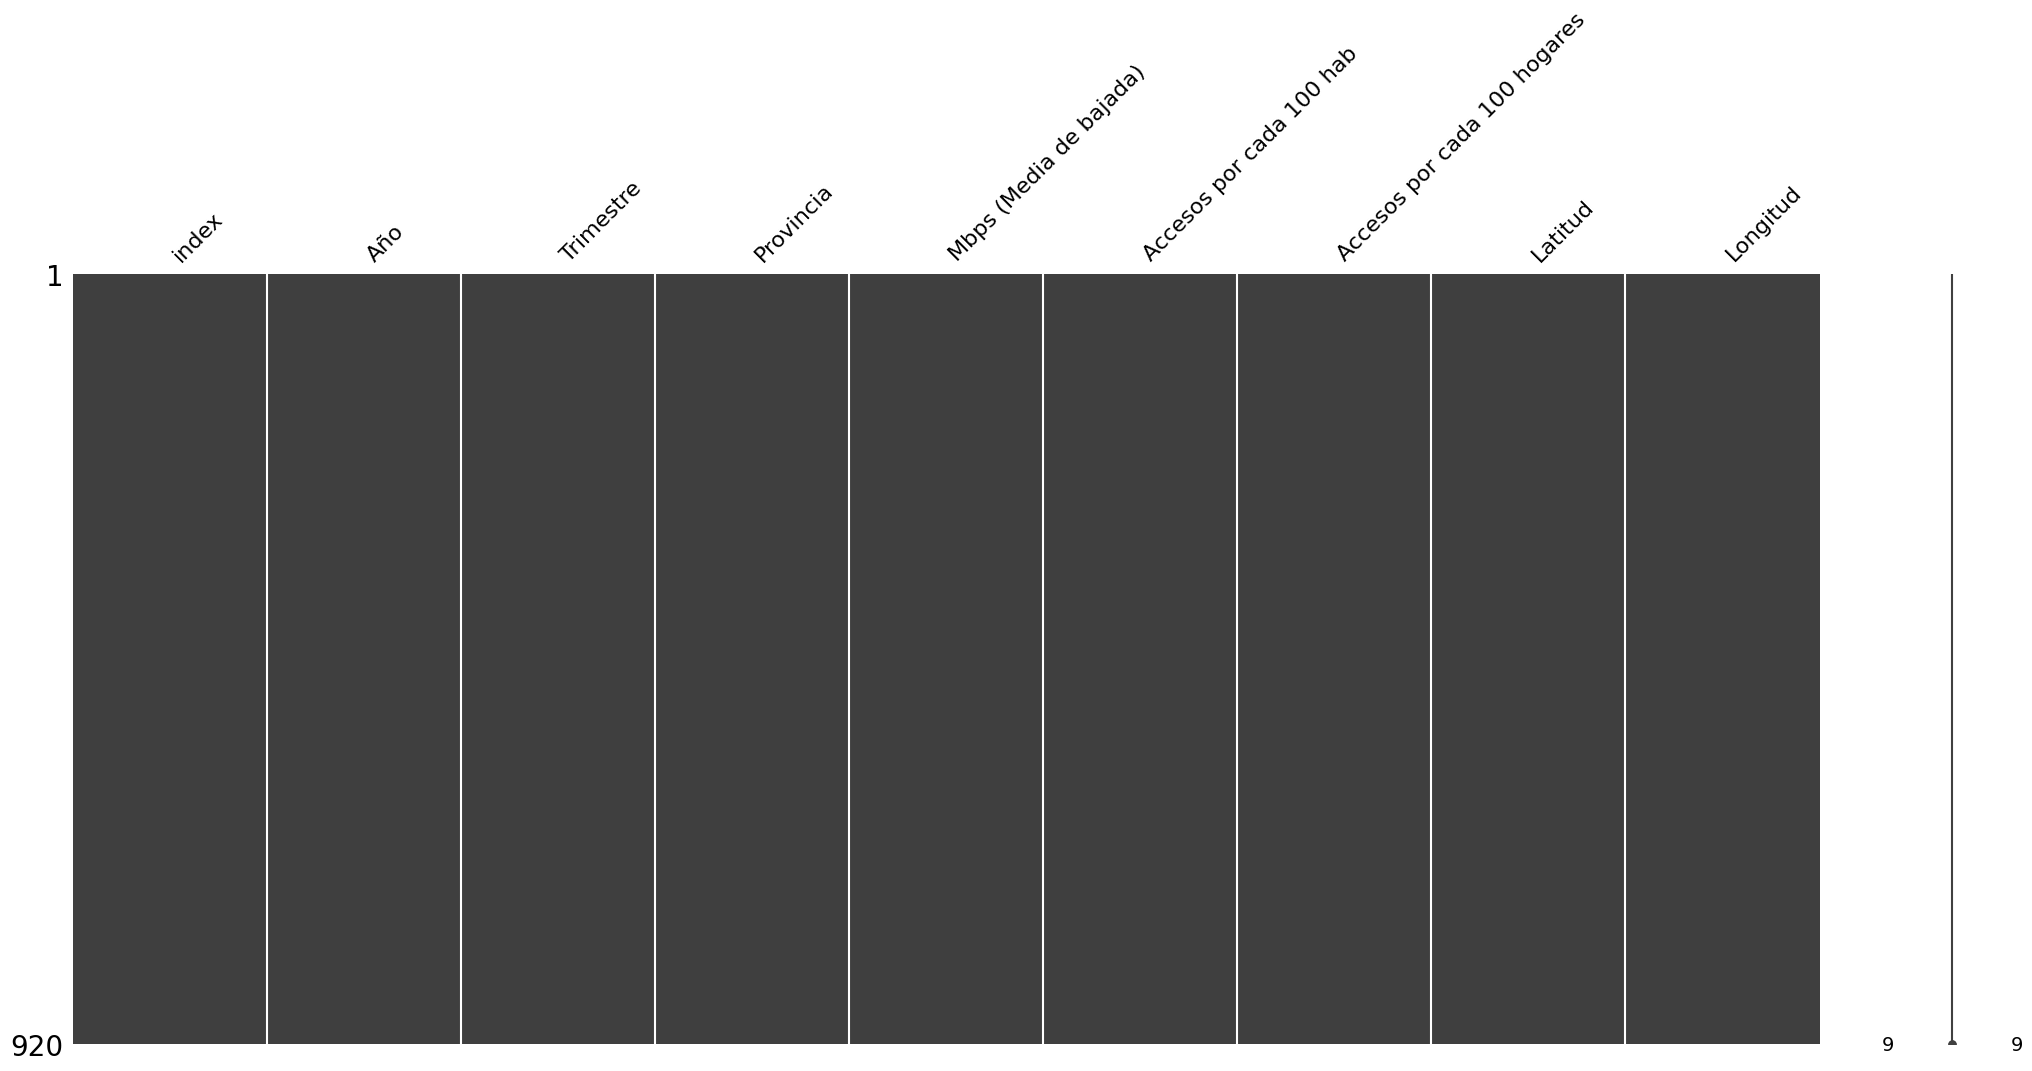

In [18]:
msno.matrix(df_maps)
#Se eliminaron unos cuantos nulos en la latitud y la longitud
df_maps = df_maps.dropna(subset=['Longitud','Latitud'])

### Valores duplicados

In [19]:
#No se tienen valores duplicados
duplicados_df_maps = df_maps[df_maps.duplicated()]
print(duplicados_df_maps)

Empty DataFrame
Columns: [index, Año, Trimestre, Provincia, Mbps (Media de bajada), Accesos por cada 100 hab, Accesos por cada 100 hogares, Latitud, Longitud]
Index: []


### Valores faltantes

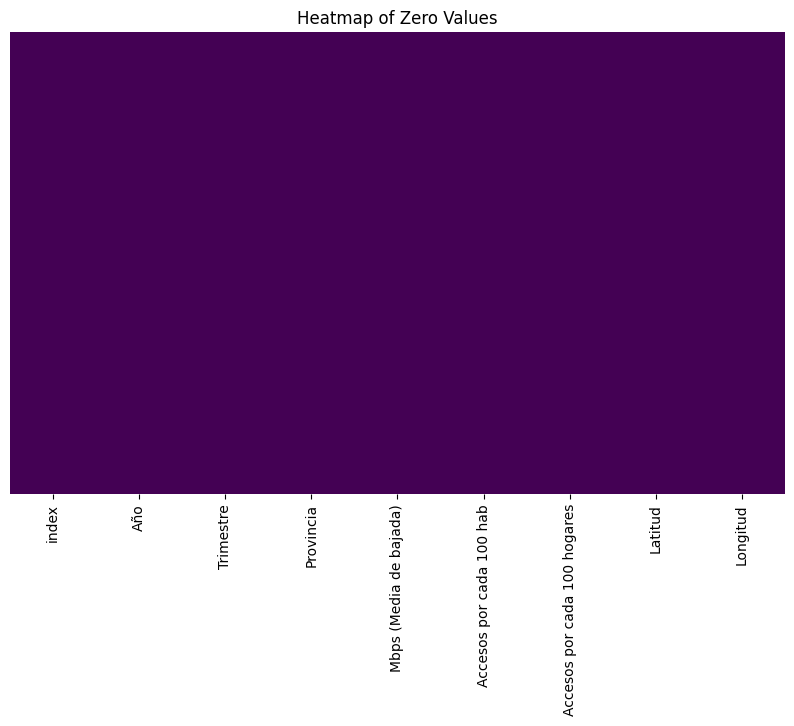

In [20]:
#No se tienen valores en 0
def plot_zeros(data):
    zeros = (data == 0).astype(int)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.heatmap(zeros, cbar=False, cmap='viridis', yticklabels=False)
    ax.set_title('Heatmap of Zero Values')
    plt.show()

# Visualizar los valores 0
plot_zeros(df_maps)

### Tipos de datos

In [21]:
print(df_maps.dtypes)

index                             int64
Año                               int64
Trimestre                         int64
Provincia                        object
Mbps (Media de bajada)          float64
Accesos por cada 100 hab        float64
Accesos por cada 100 hogares    float64
Latitud                         float64
Longitud                        float64
dtype: object


In [22]:
df_maps.columns

Index(['index', 'Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)',
       'Accesos por cada 100 hab', 'Accesos por cada 100 hogares', 'Latitud',
       'Longitud'],
      dtype='object')

### Analisis Outlier

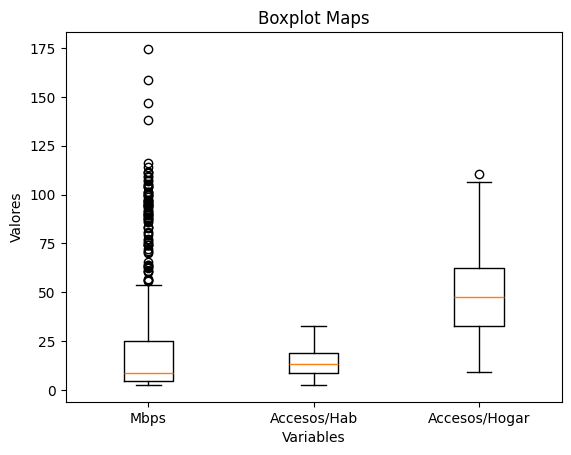

In [23]:
plt.boxplot([df_maps['Mbps (Media de bajada)'],
            df_maps['Accesos por cada 100 hab'],
            df_maps['Accesos por cada 100 hogares']])
plt.xticks([1, 2, 3], ['Mbps', 'Accesos/Hab', 'Accesos/Hogar']) 
plt.xlabel('Variables')  # Etiqueta del eje x
plt.ylabel('Valores')  # Etiqueta del eje y
plt.title('Boxplot Maps')  # Título del gráfico
plt.show()

In [24]:
Q1  = df_maps['Mbps (Media de bajada)'].quantile(0.25)
print('Primer Cuartil: ', Q1)
Q3  = df_maps['Mbps (Media de bajada)'].quantile(0.75)
print('Tercer Cuartil: ', Q3)
IQR = Q3 - Q1
print('Rango Intercuartil: ', IQR)
Mediana = df_maps['Mbps (Media de bajada)'].median()
print('Mediana: ', Mediana)
Valor_minimo = df_maps['Mbps (Media de bajada)'].min()
print('Valor minimo: ', Valor_minimo)
Valor_maximo = df_maps['Mbps (Media de bajada)'].max()
print('Valor maximo: ', Valor_maximo)
BI_calculado = (Q1 - 1.5 * IQR)
print('Bigote inferior: ', BI_calculado)
BS_calculado = (Q1 + 1.5 * IQR)
print('Bigote superior: ', BS_calculado)

Primer Cuartil:  4.5594060058521855
Tercer Cuartil:  24.89788519776705
Rango Intercuartil:  20.338479191914864
Mediana:  8.577329514118048
Valor minimo:  2.573729210919676
Valor maximo:  174.59
Bigote inferior:  -25.94831278202011
Bigote superior:  35.06712479372448


In [25]:
Q1  = df_maps['Accesos por cada 100 hab'].quantile(0.25)
print('Primer Cuartil: ', Q1)
Q3  = df_maps['Accesos por cada 100 hab'].quantile(0.75)
print('Tercer Cuartil: ', Q3)
IQR = Q3 - Q1
print('Rango Intercuartil: ', IQR)
Mediana = df_maps['Accesos por cada 100 hab'].median()
print('Mediana: ', Mediana)
Valor_minimo = df_maps['Accesos por cada 100 hab'].min()
print('Valor minimo: ', Valor_minimo)
Valor_maximo = df_maps['Accesos por cada 100 hab'].max()
print('Valor maximo: ', Valor_maximo)
BI_calculado = (Q1 - 1.5 * IQR)
print('Bigote inferior: ', BI_calculado)
BS_calculado = (Q1 + 1.5 * IQR)
print('Bigote superior: ', BS_calculado)

Primer Cuartil:  8.668890722484266
Tercer Cuartil:  19.041351317730268
Rango Intercuartil:  10.372460595246002
Mediana:  13.07505938173163
Valor minimo:  2.684668505334274
Valor maximo:  32.93
Bigote inferior:  -6.889800170384737
Bigote superior:  24.227581615353266


In [26]:
Q1  = df_maps['Accesos por cada 100 hogares'].quantile(0.25)
print('Primer Cuartil: ', Q1)
Q3  = df_maps['Accesos por cada 100 hogares'].quantile(0.75)
print('Tercer Cuartil: ', Q3)
IQR = Q3 - Q1
print('Rango Intercuartil: ', IQR)
Mediana = df_maps['Accesos por cada 100 hogares'].median()
print('Mediana: ', Mediana)
Valor_minimo = df_maps['Accesos por cada 100 hogares'].min()
print('Valor minimo: ', Valor_minimo)
Valor_maximo = df_maps['Accesos por cada 100 hogares'].max()
print('Valor maximo: ', Valor_maximo)
BI_calculado = (Q1 - 1.5 * IQR)
print('Bigote inferior: ', BI_calculado)
BS_calculado = (Q1 + 1.5 * IQR)
print('Bigote superior: ', BS_calculado)

Primer Cuartil:  32.60462330785211
Tercer Cuartil:  62.330251689722495
Rango Intercuartil:  29.725628381870386
Mediana:  47.55812081146656
Valor minimo:  9.347207842190002
Valor maximo:  110.49
Bigote inferior:  -11.983819264953468
Bigote superior:  77.19306588065768


Ubicamos los outliers

In [27]:
ubicacion_outliers = (df_maps['Mbps (Media de bajada)'] < BI_calculado) | (df_maps['Mbps (Media de bajada)'] > BS_calculado)
outliers = df_maps[ubicacion_outliers]
outliers = outliers.sort_values('Mbps (Media de bajada)')
lista_outliers = outliers['Mbps (Media de bajada)'].tolist()
print(outliers['Mbps (Media de bajada)'])

53      77.32
61      79.10
30      80.29
38      80.80
15      83.04
93      83.33
7       83.35
47      86.13
75      86.71
70      87.41
98      87.47
24      87.90
114     88.33
52      89.37
1       89.40
81      89.81
111     90.30
58      90.55
104     91.24
35      91.49
88      92.22
82      93.42
12      93.65
59      93.97
97      94.72
74      94.80
65      94.87
105     95.37
91      95.79
29      96.26
36      96.57
68      96.69
51      97.21
42      97.39
45      98.85
13      99.63
28      99.64
19      99.81
5      100.90
6      101.18
22     101.55
63     103.84
94     104.02
71     104.33
40     104.97
48     105.45
2      107.14
25     107.50
96     108.77
73     109.57
92     111.00
27     111.50
50     111.82
4      114.03
69     116.18
46     138.35
23     146.84
0      158.49
17     174.59
Name: Mbps (Media de bajada), dtype: float64


In [28]:
ubicacion_outliers = (df_maps['Accesos por cada 100 hab'] < BI_calculado) | (df_maps['Accesos por cada 100 hab'] > BS_calculado)
outliers = df_maps[ubicacion_outliers]
outliers = outliers.sort_values('Accesos por cada 100 hab')
lista_outliers = outliers['Accesos por cada 100 hab'].tolist()
print(outliers['Accesos por cada 100 hab'])

Series([], Name: Accesos por cada 100 hab, dtype: float64)


In [29]:
ubicacion_outliers = (df_maps['Accesos por cada 100 hogares'] < BI_calculado) | (df_maps['Accesos por cada 100 hogares'] > BS_calculado)
outliers = df_maps[ubicacion_outliers]
outliers = outliers.sort_values('Accesos por cada 100 hogares')
lista_outliers = outliers['Accesos por cada 100 hogares'].tolist()
print(outliers['Accesos por cada 100 hogares'])

217     77.260161
180     77.304585
274     77.349356
400     77.452694
138     77.580000
          ...    
17     102.070000
90     104.230000
44     105.950000
67     106.380000
21     110.490000
Name: Accesos por cada 100 hogares, Length: 105, dtype: float64


Estaba claro que habrian outliers, puesto que es normal que en una nación no se encuentre de manera uniforme las mismas velocidades en cada provincia. Si bien esto puede deberse a fallos tecnologicos por causas naturales como la interferencia, o algún tipo de deficiencia tecnologica se ha evidenciado que en la mayoria de los casos puede deberse a la situación economica por la que atraviesa la provincia y su densidad poblacional.

### Analisis estadisticos de datos

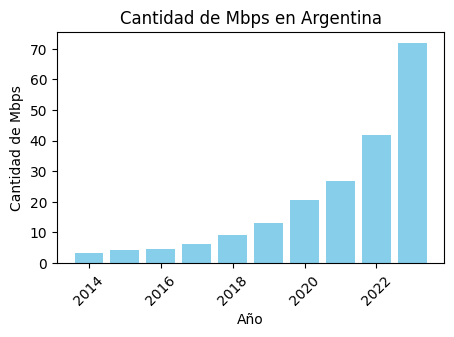

In [30]:
promedio_velocidad_año = df_maps.groupby('Año')['Mbps (Media de bajada)'].mean().reset_index()
plt.figure(figsize=(5, 3))  
plt.bar(promedio_velocidad_año['Año'], promedio_velocidad_año['Mbps (Media de bajada)'], color='skyblue')

plt.xlabel('Año')
plt.ylabel('Cantidad de Mbps')
plt.title('Cantidad de Mbps en Argentina')

plt.xticks(rotation=45)  # Rotar los nombres de los meses si es necesario

plt.show()

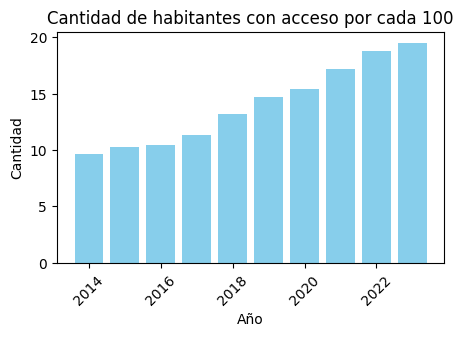

In [31]:
promedio_velocidad_año = df_maps.groupby('Año')['Accesos por cada 100 hab'].mean().reset_index()
plt.figure(figsize=(5, 3))  
plt.bar(promedio_velocidad_año['Año'], promedio_velocidad_año['Accesos por cada 100 hab'], color='skyblue')

plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Cantidad de habitantes con acceso por cada 100')

plt.xticks(rotation=45)  # Rotar los nombres de los meses si es necesario

plt.show()

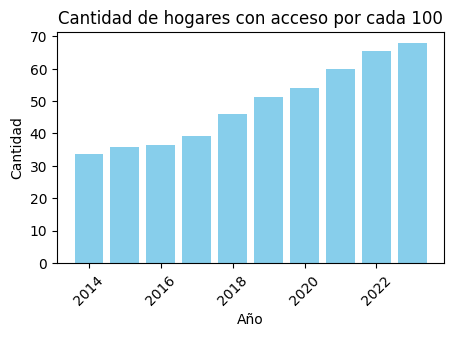

In [32]:
promedio_velocidad_año = df_maps.groupby('Año')['Accesos por cada 100 hogares'].mean().reset_index()
plt.figure(figsize=(5, 3))  
plt.bar(promedio_velocidad_año['Año'], promedio_velocidad_año['Accesos por cada 100 hogares'], color='skyblue')

plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Cantidad de hogares con acceso por cada 100')

plt.xticks(rotation=45)  # Rotar los nombres de los meses si es necesario

plt.show()

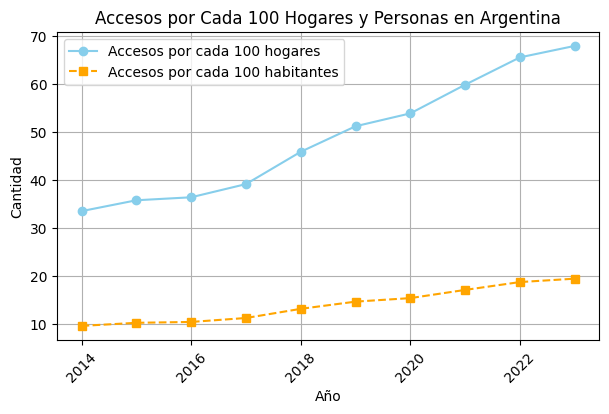

In [41]:
promedios_por_año = df_maps.groupby('Año').agg({
    'Accesos por cada 100 hogares': 'mean',
    'Accesos por cada 100 hab': 'mean'
}).reset_index()

plt.figure(figsize=(7, 4))

plt.plot(promedios_por_año['Año'], promedios_por_año['Accesos por cada 100 hogares'], marker='o', linestyle='-', color='skyblue', label='Accesos por cada 100 hogares')
plt.plot(promedios_por_año['Año'], promedios_por_año['Accesos por cada 100 hab'], marker='s', linestyle='--', color='orange', label='Accesos por cada 100 habitantes')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Accesos por Cada 100 Hogares y Personas en Argentina')
plt.legend()
plt.xticks(rotation=45)  # Rotar los nombres de los años si es necesario
plt.grid(True)
plt.show()

1. La evolución tecnologica cada año nos sorprende mas, con cada avance, aumenta su eficacia, su velocidad y disminuye su costo adquisitivo. Por ello es de esperarse que esta grafica de velocidades siga subiendo a lo largo del tiempo en una Nación
2. Las ultimas graficas estan relacionadas, su diferencia radica en la escala en la que se registra el analisis, sin embargo dada su extrema similitud en las dos se puede concluir para ambas graficas lo siguiente:

Año tras año se espera de un pais que desde el area de gestión y desarrollo tecnologico se cumplan ciertas metricas que lleven al mismo a una situación de avance constante de en este caso el acceso que tiene cada persona y cada hogar al internet. Este mismo se vió interrumpido entre los periodos 2014-2016 que son casi dos años en los que no se lograba mayor cambio. Se neceseta analizar que pudo haber ocurrido en esa epoca para evitar que se repita tal situación.

### Analisis de correlaciones multivariado

In [34]:
df_maps.columns

Index(['index', 'Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)',
       'Accesos por cada 100 hab', 'Accesos por cada 100 hogares', 'Latitud',
       'Longitud'],
      dtype='object')

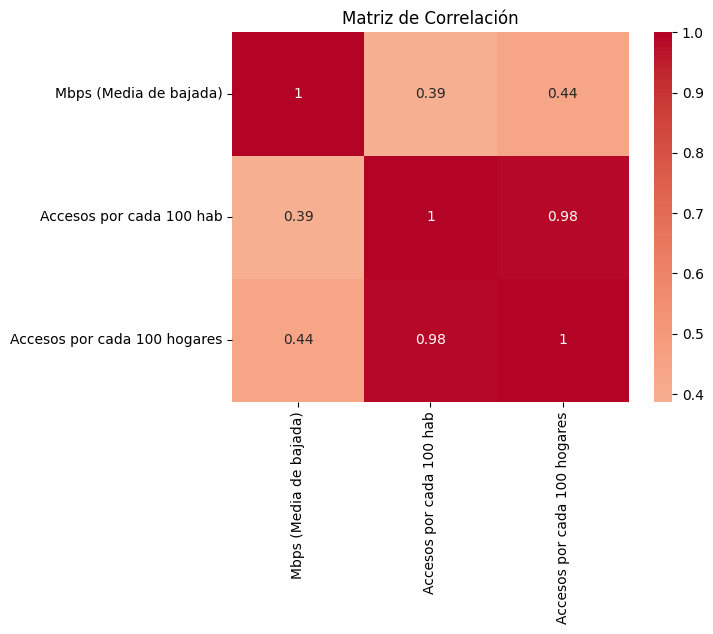

In [35]:
columnas_interes = ['Mbps (Media de bajada)','Accesos por cada 100 hab','Accesos por cada 100 hogares']
df_maps_columnas_interes = df_maps[columnas_interes]
correlation_matrix = df_maps_columnas_interes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()